# Spam classification using multinomial naive bayes

### Structure
- Import libraries
- Load and prepare the Dataset
- Explore the Data
- Text (Message) analytics
- Transform data for model (CountVectorizer)
- Classification/Predictive Analytics (multinomial naive bayes)
- R2-Score and Confusion matrix

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

### Load Dataset
- deleted unnecessary columns
- renamed column names to clearer names (category, message)

In [2]:
df = pd.read_csv("../input/spam.csv", encoding = "latin-1", usecols=["v1", "v2"])
df.columns = ["label", "message"]

### Exploratory Data Analysis

- general informations about data (volume, dtypes)
- display first 5 entries
- visualize distribution of spam and ham (no-spam)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


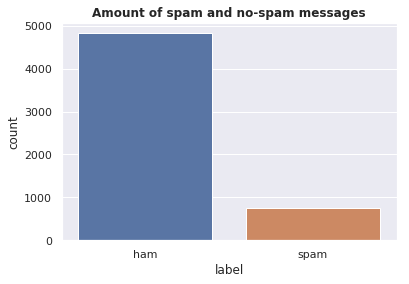

In [5]:
sns.set()
sns.countplot(data = df, x= df["label"]).set_title("Amount of spam and no-spam messages", fontweight = "bold")
plt.show()

### Text (Message) Analytics

- Filter Top 15 and Bottom 15 words and the number of their occurences
- Visualize Top 15 and Bottom 15 spam/no spam words

**Conclusion**

Top 15 spam and no spam words have many similarities as both of them represent common words that are used in many messages, wether it being spam or no spam (ham). 

Same goes for Bottom 15 spam and no spam words. Both include uncommon words that occur only once and are thus not relevant for the classification model and should not be fitted as training data for the classifier to avoid overfitting.

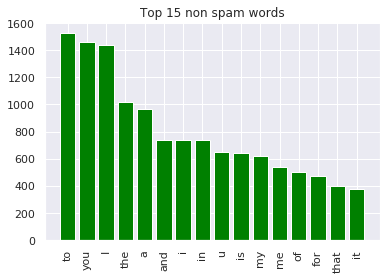

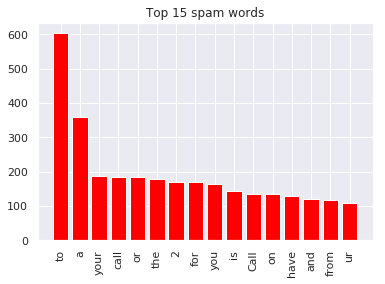

In [6]:
non_spam_messages = df[df["label"]=="ham"]["message"] #filters non-spam (ham) messages
l = [message.split() for message in non_spam_messages] #creates lists of words from each message
no_spam_words = list(itertools.chain.from_iterable(l)) #concatenates all lists of words into one

spam_messages = df[df["label"]=="spam"]["message"] 
k = [message.split() for message in spam_messages]
spam_words = list(itertools.chain.from_iterable(k))

non_spam = Counter(no_spam_words) #creates dictionary with occurrences of each no_spam word
spam = Counter(spam_words) #creates dictionary occurences of each spam word (creates dictionary)

non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True) #creates list sorted descending by value (number of occurences) 
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True) 

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

#slice word and occurences so I can easily plot them
top_words_nonspam = [i[0] for i in top15_nonspam]  #(to,1530) [0]=to [1]=1530  
top_occurences_nonspam = [i[1] for i in top15_nonspam]

top_words_spam = [i[0] for i in top15_spam]       
top_occurences_spam = [i[1] for i in top15_spam]

plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 non spam words")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 spam words")
plt.xticks(rotation='vertical')
plt.show()

### Transform data for Model (CountVectoriter)


#### Use CountVectoriter to transform train and test date into a sparce matrix (based on train data)
- Split data into Train and test data (75%/25%)
- Train CountVectorizer with the train data so it can learn to vocabular and count how often a word as been used. This is needes as input Value for the multinomial naive bayes because it can't handle raw test_messages.
- Transform train and test date into a sparce matrix (rowsxcolumns) which creates a new column for every word in the messages and counts how often they have been used in each message.

Example:

Message 1: random text text

Message 2: another random text 

After transformation: 2x4 sparce matrix (type = integer) with 4 Stored elements in Compressed Sparse Row format (one element for each unique word)

                                      Displayed as an Array: array([[0, 1, 2], 
                                                                    [1, 1, 1]] 
                              
                              Message 1: another = 0x, random = 1x, text = 2x. 
                              Message 2: another = 1x, random = 1x, text = 1x.
                              
This means we will have thousands of columns, one for each word.  One of the strenghts of the (multinomial) naive bayes is that it can handle a lot of data. 

#### Filter non-relevant words

- The CountVectoricer allows us to set a minimum and maximum occurence requirement, which allows us to filter out the non-relevant/harmful words (most common/uncommon) which I displayed in the Text (Message) Analytics. This will reduce the amount of columns we train our classifier with. We can use the parameters min_features and max_features to do this. To be sure all stop words are removed, I added the stop_words = 'english' parameter.

In [7]:
X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_df = 0.95, stop_words = 'english') #1% / 300 occurences 
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)
print(X_train)
print(X_test)

  (0, 41)	1
  (0, 78)	1
  (1, 15)	1
  (1, 29)	1
  (1, 33)	1
  (1, 48)	1
  (1, 70)	1
  (1, 72)	1
  (2, 20)	1
  (3, 8)	1
  (3, 20)	3
  (3, 48)	2
  (3, 78)	1
  (3, 100)	1
  (4, 24)	1
  (4, 29)	1
  (4, 57)	1
  (4, 71)	1
  (4, 75)	2
  (4, 78)	2
  (6, 8)	1
  (6, 75)	2
  (6, 95)	1
  (7, 22)	1
  (7, 53)	1
  :	:
  (4169, 81)	1
  (4170, 13)	2
  (4171, 17)	1
  (4171, 76)	1
  (4172, 41)	1
  (4172, 59)	1
  (4173, 63)	1
  (4174, 25)	1
  (4174, 45)	1
  (4175, 20)	3
  (4175, 51)	1
  (4175, 56)	1
  (4175, 61)	1
  (4175, 67)	1
  (4175, 92)	1
  (4176, 30)	1
  (4176, 35)	1
  (4176, 40)	1
  (4176, 67)	1
  (4176, 93)	1
  (4176, 103)	1
  (4177, 40)	1
  (4177, 42)	1
  (4177, 101)	1
  (4178, 77)	1
  (0, 9)	1
  (0, 33)	1
  (0, 36)	1
  (2, 10)	1
  (2, 72)	1
  (2, 81)	1
  (3, 14)	1
  (3, 48)	1
  (3, 87)	1
  (3, 93)	1
  (4, 41)	1
  (5, 17)	1
  (5, 39)	1
  (5, 44)	1
  (6, 20)	1
  (7, 28)	1
  (7, 35)	1
  (7, 55)	1
  (8, 21)	1
  (8, 28)	1
  (9, 20)	1
  (9, 67)	1
  (10, 22)	1
  (11, 4)	1
  (11, 13)	1
  :	:
  (1381, 74

In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9447236180904522


### Confusion-Matrix

Due to the fact that the already classified data we trained our model with is not very balanced (way more no-spam messages), we don't know if the  R2 score is reliable. With the Confusion matrix, we can evaluate the accuracy of the spam classification more clearer and see exactly where our multinomial naive Bayes has its errors.

Format of Confusion-Matrix:

| True ham | False spam
| --- | --- |
| False ham | True spam

In [9]:
y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1168,   28],
       [  49,  148]])

In [10]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  model.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Free entry in 2 a wkly comp to win FA Cup fina...")

'This message is spam!'

## Hyperparameter Tuning

In [11]:
# Print the first 10 features
print(len(cv.get_feature_names()))

# Print the first 5 vectors of the tfidf training data
print(len(X_train.A[0]))

104
104


In [12]:
##########################
# SAVE-LOAD using joblib #
##########################
import joblib

# save
joblib.dump(model, "model.pkl")
joblib.dump(cv, "vectorizer.pkl")

# load
clf2 = joblib.load("model.pkl")

#clf2.predict(X[0:1])

In [13]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  clf2.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Free entry in 2 a wkly comp to win FA Cup fina...")

'This message is spam!'